# Classification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Team RR-7#RAVE**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: EA - Twitter Sentiment Classification

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages



In [1]:
# Libraries for data loading, data manipulation, and data visualization
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Library for basic plotting in Python
import seaborn as sns  # Library for statistical data visualization
import plotly.express as px  # Library for interactive visualizations
from IPython.core.display import HTML  # Library for rendering HTML content in Jupyter Notebook
import string

# Libraries for data preparation and model building
from sklearn.feature_extraction.text import CountVectorizer


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
#Load the data
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test_with_no_labels.csv")

In [3]:
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [4]:
df_train.tail()

,sentiment,message,tweetid
15814,1,RT @ezlusztig: They took down the material on ...,22001
15815,2,RT @washingtonpost: How climate change could b...,17856
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732
15818,0,RT @Chet_Cannon: .@kurteichenwald's 'climate c...,806319


In [5]:
df_train.shape

(15819, 3)

In [6]:
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \r\nPu...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [7]:
df_test.shape

(10546, 2)

<a id="three"></a>
## 3. Data Cleaning

| In this section, we performed indepth cleaning of the data |
---


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


In [10]:
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [11]:
df_test.isnull().sum()

message    0
tweetid    0
dtype: int64

### To remove the punction marks, @mentions and special characters, we create a function 

In [12]:
import re

def clean_tweet(twts):
    ''' This function takes a array, list or series like objects containing tweets
        and replace all with empty pace, and convert to lower case
    '''
    
    # to convert to lower case
    twts = twts.lower()
    
    
    # Remove mentions (e.g., @username)
    twts = re.sub(r'@[A-Za-z0-9_]+', '', twts)

    # Remove URLs (e.g., https://example.com)
    twts = re.sub(r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+', '', twts)

    # Remove punctuation marks
    twts = re.sub(r'[^\w\s]', '', twts)

    return twts

In [13]:
#df = df_train.copy() # assign the dataframe to a new object

#df = pd.concat([df_train,df_test])

df = df_train

df['message'] = df['message'].apply(clean_tweet)

In [14]:
df.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,its not like we lack evidence of anthropogenic...,126103
2,2,rt researchers say we have three years to act...,698562
3,1,todayinmaker wired 2016 was a pivotal year in...,573736
4,1,rt its 2016 and a racist sexist climate chang...,466954


In [15]:
df.tail()

,sentiment,message,tweetid
15814,1,rt they took down the material on global warm...,22001
15815,2,rt how climate change could be breaking up a ...,17856
15816,0,notiven rt nytimesworld what does trump actual...,384248
15817,-1,rt hey liberals the climate change crap is a ...,819732
15818,0,rt s climate change equation in 4 screenshots,806319


In [16]:
df.shape

(15819, 3)

In [17]:
# check for duplicate row in the data frame

df.duplicated().sum()

0

In [18]:
with pd.option_context('display.max_colwidth', None):
  display(df)

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what via,625221
1,1,its not like we lack evidence of anthropogenic global warming,126103
2,2,rt researchers say we have three years to act on climate change before its too late,698562
3,1,todayinmaker wired 2016 was a pivotal year in the war on climate change,573736
4,1,rt its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight,466954
...,...,...,...
15814,1,rt they took down the material on global warming lgbt rights and health care but now theyre hocking melanias qvc https,22001
15815,2,rt how climate change could be breaking up a 200millionyearold relationship,17856
15816,0,notiven rt nytimesworld what does trump actually believe about climate change rick perry joins other aides in,384248
15817,-1,rt hey liberals the climate change crap is a hoax that ties to agenda2030\r\nthe climate is being changed byãââ,819732


In [19]:
# Function to remove 'RT' from tweets
def remove_rt(tweet):
    return tweet.replace('rt', '')

# Apply the function to the 'tweets' column
df['message'] = df['message'].apply(remove_rt)

In [20]:
with pd.option_context('display.max_colwidth', None):
  display(df)

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what via,625221
1,1,its not like we lack evidence of anthropogenic global warming,126103
2,2,researchers say we have three years to act on climate change before its too late,698562
3,1,todayinmaker wired 2016 was a pivotal year in the war on climate change,573736
4,1,its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight,466954
...,...,...,...
15814,1,they took down the material on global warming lgbt rights and health care but now theyre hocking melanias qvc https,22001
15815,2,how climate change could be breaking up a 200millionyearold relationship,17856
15816,0,notiven nytimesworld what does trump actually believe about climate change rick perry joins other aides in,384248
15817,-1,hey liberals the climate change crap is a hoax that ties to agenda2030\r\nthe climate is being changed byãââ,819732


We noticed that some of the tweets contained non-english characters e.g. ãââ. 

So wrote a function to get rid of them

In [21]:
#removes all non-english (non-ascii) characters
def remove_non_ascii(message):
    return ''.join([l for l in message if l in string.printable])

df['message'] = df['message'].apply(remove_non_ascii)

#### NOTE: | Our data is relatively clean now we can move on with the EDA section to understand more about the data |

In [22]:
with pd.option_context('display.max_colwidth', None):
  display(df)

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what via,625221
1,1,its not like we lack evidence of anthropogenic global warming,126103
2,2,researchers say we have three years to act on climate change before its too late,698562
3,1,todayinmaker wired 2016 was a pivotal year in the war on climate change,573736
4,1,its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight,466954
...,...,...,...
15814,1,they took down the material on global warming lgbt rights and health care but now theyre hocking melanias qvc https,22001
15815,2,how climate change could be breaking up a 200millionyearold relationship,17856
15816,0,notiven nytimesworld what does trump actually believe about climate change rick perry joins other aides in,384248
15817,-1,hey liberals the climate change crap is a hoax that ties to agenda2030\r\nthe climate is being changed by,819732


## 4. Exploratory Data Analysis (EDA)


| In this section, we performed an in-depth analysis of all the variables in the DataFrame. |
---

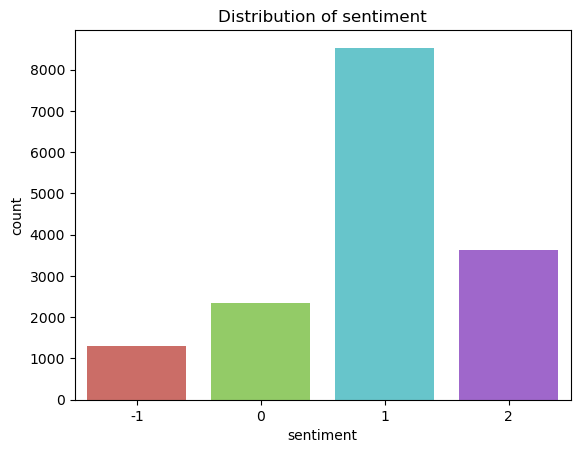

In [23]:
# To visualize the distributon of the sentiments, we plot a count plot and the unique sentiments we have 

sns.countplot(x = 'sentiment', data = df, palette="hls")
plt.title("Distribution of sentiment");

['pro' 'news' 'neutral' 'anti']


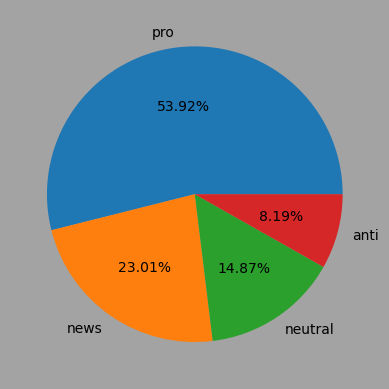

In [24]:
pie_x = df.sentiment.value_counts()
labels = df.sentiment.unique()


# Define the label mapping dictionary
label_mapping = {1: 'pro', 2: 'news', 0: 'neutral', -1: 'anti'}

# Create a vectorized function to apply the mapping
vfunc = np.vectorize(lambda x: label_mapping[x])

# Apply the mapping to the labels
mapped_labels = vfunc(labels)
print(mapped_labels)

# Remove the white background
plt.figure().set_facecolor('#A3A3A3')
plt.pie(df['sentiment'].value_counts(),autopct='%0.2f%%', labels = mapped_labels)
plt.show()

#### Observation: 

- from the bar graph above, we can deduce that we have 4 groups of sentiments.
- the sentiment is imbalanced

### let explore the tweets to generate insights

In [25]:
# install the wordcloud to create the word visuals

!pip install wordcloud

#### To create a word cloud we first need to tokenize the tweets, lemmatize or stem the words and then join all as single sentences to create the word cloud

- The word cloud will be divided into two groups one for people who believe in the effect of climate change and the other for those who do not beleieve

In [26]:
# import the word tokenizer to tokenize the twts, and lemmatizer to find the root word of the words in each message
# from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


In [27]:
# tokenize the twts
df['message'] = df['message'].apply(lambda x: x.split())

In [28]:
#Initialise the lemmatizer
lemma = WordNetLemmatizer()

# Define a function to lemmatize a single tweet
def lemmatize_tweet(tweet):
    
    # Lemmatize each word and join them back into a single string
    lemmatized_words = [lemma.lemmatize(twt) for twt in tweet]
    lemmatized_tweet = ' '.join(lemmatized_words)

    return lemmatized_tweet

In [29]:
df['clean_tweet'] = df['message'].apply(lemmatize_tweet)

In [30]:
df.head()

,sentiment,message,tweetid,clean_tweet
0,1,"[polyscimajor, epa, chief, doesnt, think, carb...",625221,polyscimajor epa chief doesnt think carbon dio...
1,1,"[its, not, like, we, lack, evidence, of, anthr...",126103,it not like we lack evidence of anthropogenic ...
2,2,"[researchers, say, we, have, three, years, to,...",698562,researcher say we have three year to act on cl...
3,1,"[todayinmaker, wired, 2016, was, a, pivotal, y...",573736,todayinmaker wired 2016 wa a pivotal year in t...
4,1,"[its, 2016, and, a, racist, sexist, climate, c...",466954,it 2016 and a racist sexist climate change den...


#### We removed the stop words from the clean_tweets before drawing our wordcloud

In [31]:
# create a function that removes stop words
def remove_stopwords(text):
    
    # create a set containing the stopwords we wish to remove
    stop_words = set(stopwords.words('english'))
    
    text = nltk.word_tokenize(text.lower())
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stop_words:
            y.append(i)
            
    return " ".join(y)

In [32]:
df['clean_tweet'] = df['clean_tweet'].apply(remove_stopwords)
df.head()

,sentiment,message,tweetid,clean_tweet
0,1,"[polyscimajor, epa, chief, doesnt, think, carb...",625221,polyscimajor epa chief doesnt think carbon dio...
1,1,"[its, not, like, we, lack, evidence, of, anthr...",126103,like lack evidence anthropogenic global warming
2,2,"[researchers, say, we, have, three, years, to,...",698562,researcher say three year act climate change late
3,1,"[todayinmaker, wired, 2016, was, a, pivotal, y...",573736,todayinmaker wired 2016 wa pivotal year war cl...
4,1,"[its, 2016, and, a, racist, sexist, climate, c...",466954,2016 racist sexist climate change denying bigo...


### Generate the wordcloud for all words in the messages

In [33]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [34]:
# visualize the frequent words using wordcloud
all_words = " ".join([sentence for sentence in df['clean_tweet']])

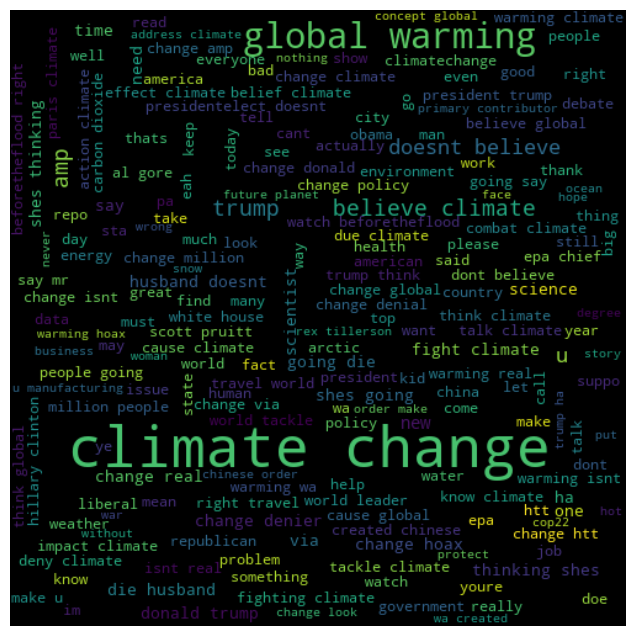

In [35]:
wordcloud_gen = wc.generate(all_words)
# plot the graph
plt.figure(figsize=(18,8))
plt.imshow(wordcloud_gen, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Sentiment 1: The tweets that support the belief of man-made climate change

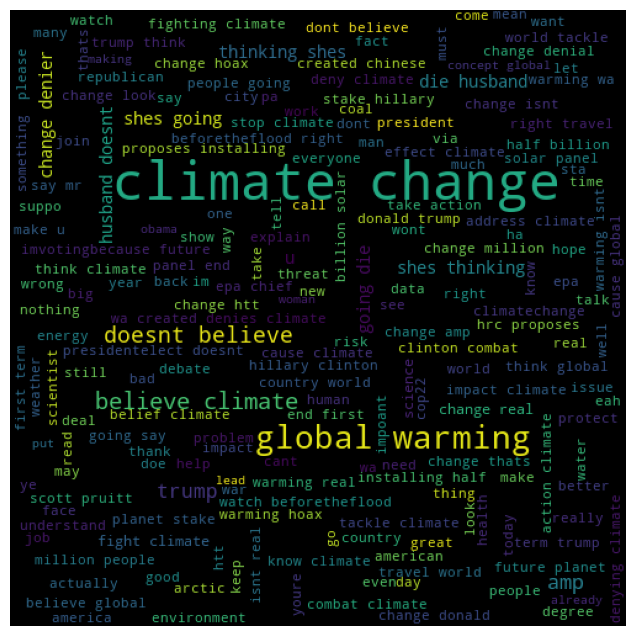

In [36]:
ptv_sentiment = wc.generate(df[df['sentiment'] == 1]['clean_tweet'].str.cat(sep = " "))
plt.figure(figsize=(18,8))
plt.imshow(ptv_sentiment)
plt.axis('off')
plt.show()

#### Sentiment 2: The tweets that link to factual news about climate change

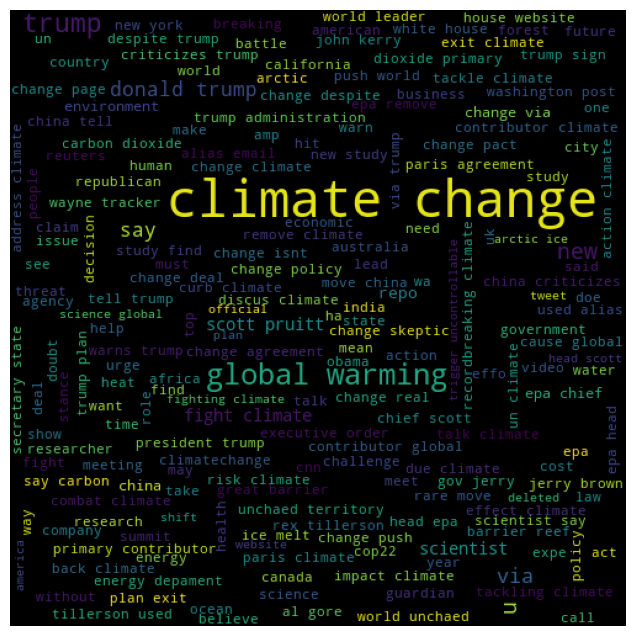

In [37]:
ptv_sentiment = wc.generate(df[df['sentiment'] == 2]['clean_tweet'].str.cat(sep = " "))
plt.figure(figsize=(18,8))
plt.imshow(ptv_sentiment)
plt.axis('off')
plt.show()

#### Sentiment 0: The tweets that neither support nor refute the belief of man-made climate change

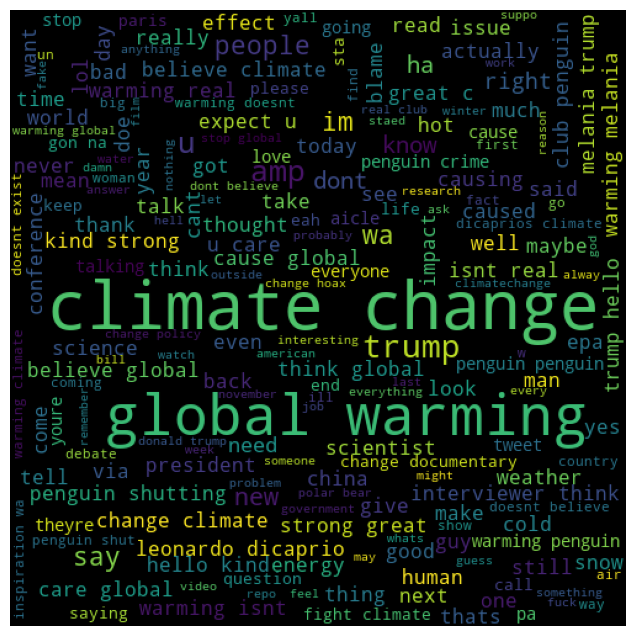

In [38]:
ptv_sentiment = wc.generate(df[df['sentiment'] == 0]['clean_tweet'].str.cat(sep = " "))
plt.figure(figsize=(18,8))
plt.imshow(ptv_sentiment)
plt.axis('off')
plt.show()

#### Sentiment -1 Anti: The tweets that do not believe in man-made climate change 

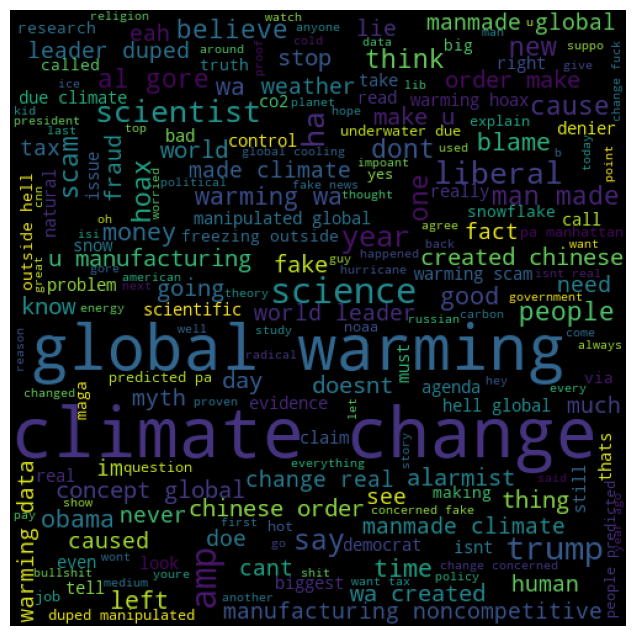

In [39]:
ptv_sentiment = wc.generate(df[df['sentiment'] == -1]['clean_tweet'].str.cat(sep = " "))
plt.figure(figsize=(18,8))
plt.imshow(ptv_sentiment)
plt.axis('off')
plt.show()

#### We checked the top ten most common words for each class of tweet

In [40]:
# Converting tweet messages to a List of words and extracting the top 10 words


# top 10 word for Sentiment 2 (linked to factual news) tweets
twts = df[df['sentiment'] == 2]['clean_tweet'].str.cat(sep= " ")
climate_twt = twts.split()


# Counting Top 10 Words in each tweet message

from collections import Counter
twt_top_10words = pd.DataFrame(Counter(climate_twt).most_common(10))
twt_top_10words.head()

,0,1
0,climate,3350
1,change,3268
2,trump,1066
3,global,507
4,warming,442


## Bar plot of top 10 words in Sentiment 2 tweets (linked to factual news) 

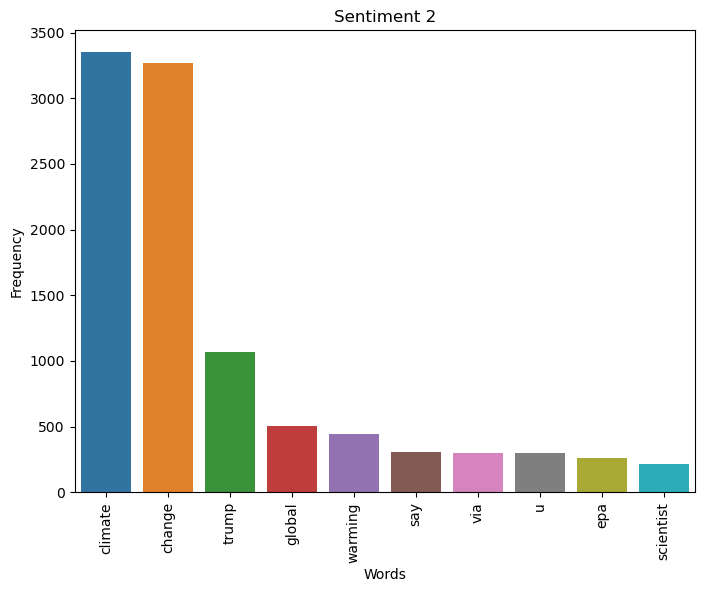

In [41]:
#plot bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x= twt_top_10words[0], y= twt_top_10words[1])
plt.xticks(rotation=90)
plt.xlabel('Words')  
plt.ylabel('Frequency')
plt.title('Sentiment 2')  
plt.show()

In [42]:
# top 10 word for sentiment 1 tweets(pro) 
twts = df[df['sentiment'] == 1]['clean_tweet'].str.cat(sep= " ")
anti_twt = twts.split()


# Counting Top 10 Words in each tweet message

from collections import Counter
anti_twt_top_10words = pd.DataFrame(Counter(anti_twt).most_common(10))
anti_twt_top_10words.head()

,0,1
0,climate,7366
1,change,7188
2,global,1597
3,warming,1451
4,trump,1099


## Bar plot of top 10 words in Sentiment 1 tweets (Pro)

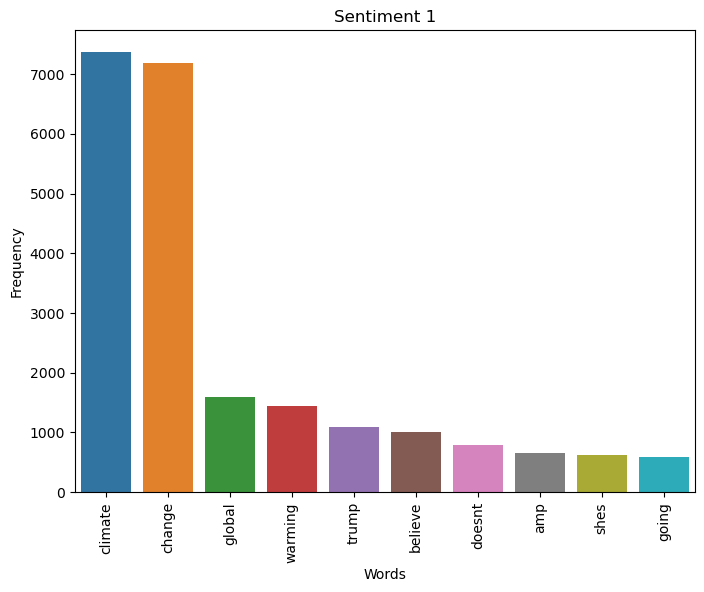

In [43]:
# plot a bar plot

plt.figure(figsize=(8, 6))
sns.barplot(x= anti_twt_top_10words[0], y= anti_twt_top_10words[1])
plt.xticks(rotation=90)
plt.xlabel('Words')  
plt.ylabel('Frequency')  
plt.title('Sentiment 1')
plt.show()

In [44]:
# top 10 word for sentiment 0 tweets (Neutral)
twts = df[df['sentiment'] == 0]['clean_tweet'].str.cat(sep= " ")
anti_twt = twts.split()


# Counting Top 10 Words in each tweet message

from collections import Counter
news_twt_top_10words = pd.DataFrame(Counter(anti_twt).most_common(10))
news_twt_top_10words.head()

,0,1
0,climate,1444
1,change,1412
2,global,1039
3,warming,1003
4,trump,177


## Bar plot of top 10 words in Sentiment 0 tweets (Neutral)

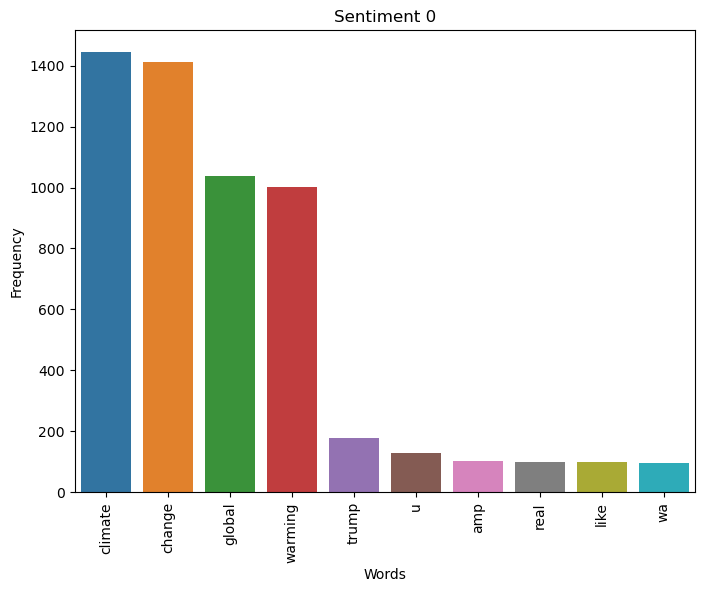

In [45]:
# plot a bar plot

plt.figure(figsize=(8, 6))
sns.barplot(x= news_twt_top_10words[0], y= news_twt_top_10words[1])
plt.xticks(rotation=90)
plt.xlabel('Words')  
plt.ylabel('Frequency')  
plt.title('Sentiment 0')
plt.show()

In [46]:
# top 10 word for sentiment -1 tweets (Anti)
twts = df[df['sentiment'] == -1]['clean_tweet'].str.cat(sep= " ")
neutral_twt = twts.split()


# Counting Top 10 Words in each tweet message

from collections import Counter
neutral_twt_top_10words = pd.DataFrame(Counter(neutral_twt).most_common(10))
neutral_twt_top_10words.head()

,0,1
0,climate,800
1,change,756
2,global,635
3,warming,612
4,wa,84


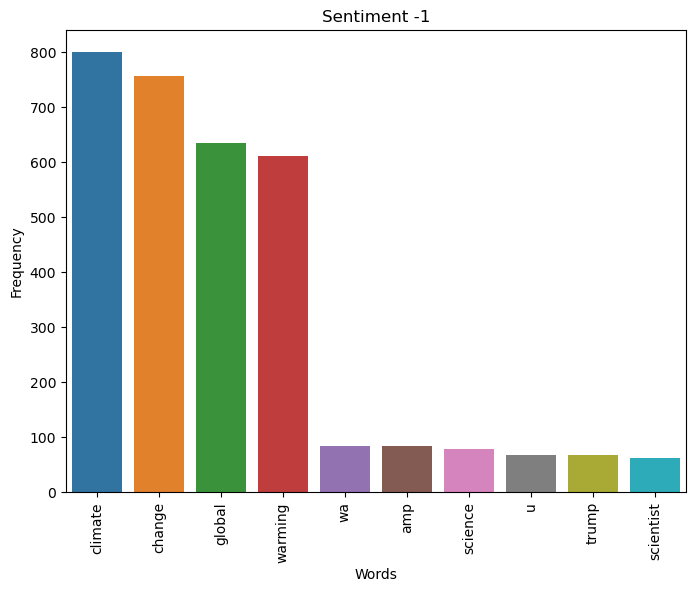

In [47]:
# plot a bar plot

plt.figure(figsize=(8, 6))
sns.barplot(x = neutral_twt_top_10words[0], y= neutral_twt_top_10words[1])
plt.xticks(rotation=90)
plt.xlabel('Words')  
plt.ylabel('Frequency')  
plt.title('Sentiment -1')
plt.show()

### Observation

- Among the observed data, approximately 53.92% express belief in man-made climate change.
- Approximately 23.01% of the observed data links to factual news about climate change.
- Around 15% of the observed data exhibit a neutral stance towards climate change.
- Approximately 8% of the observed data express disbelief in man-made climate change.
- Based on the generated word clouds, the term "climate change" emerges as the most frequently used word across all sentiment types.
- The name "Trump" appears as a prominent influencer in discussions related to climate change.

### Conclusion

- We have observed a significant increase in the popularity of the idea of climate change, as evidenced by a considerable number of tweets expressing support for climate change.
- Climate change is increasingly influencing consumer preferences and product choices. Therefore, there is a need to develop a sentiment analysis model to analyze the sentiment of Twitter users' messages about climate change.

## 4. Feature Engineering


| In this section, we extract features from the text data and tranform them into the appropriate format for training our model. |
---

#### For the sentiment classes, we'll map the 4 classes into 2 classes for the classification- pro tweets and the news tweets for 1 and the neutral and anti-tweet for 0

The mapping used in the code snippet is assigning a binary encoding to the sentiment class in the DataFrame. It maps the sentiment values of 2 and 1 to 1, indicating a positive sentiment or belief in climate change. Similarly, it maps the sentiment values of 0 and -1 to 0, indicating a neutral or negative sentiment or disbelief in climate change.

The theory behind this mapping could be based on the assumption that sentiment classes 2 and 1, which represent tweets that support the belief of man-made climate change, can be considered as positive sentiments towards climate change. Hence, they are encoded as 1. On the other hand, sentiment classes 0 and -1, which represent tweets that neither support nor refute the belief of man-made climate change or tweets that do not believe in man-made climate change, can be considered as neutral or negative sentiments. Hence, they are encoded as 0.

By creating the 'belief' column with this mapping, it provides a simplified binary representation of the sentiment classes that can be used for further analysis or modeling tasks where a binary classification approach is desired.

In [48]:
#df_new = df.copy()

In [49]:
df_new = df

In [50]:
df_new.head()

,sentiment,message,tweetid,clean_tweet
0,1,"[polyscimajor, epa, chief, doesnt, think, carb...",625221,polyscimajor epa chief doesnt think carbon dio...
1,1,"[its, not, like, we, lack, evidence, of, anthr...",126103,like lack evidence anthropogenic global warming
2,2,"[researchers, say, we, have, three, years, to,...",698562,researcher say three year act climate change late
3,1,"[todayinmaker, wired, 2016, was, a, pivotal, y...",573736,todayinmaker wired 2016 wa pivotal year war cl...
4,1,"[its, 2016, and, a, racist, sexist, climate, c...",466954,2016 racist sexist climate change denying bigo...


In [51]:
# Load the dataset into a DataFrame

# Create a new column 'sentiment' based on the mapping
#df_new['sentiment'] = df_new['sentiment'].map({2: 1, 1: 1, 0: 0, -1: 0})

#df_new.head()


In [52]:
pie_x_new = df_new.sentiment.value_counts() # to check if the data balances between the pro and the anti
pie_x_new

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

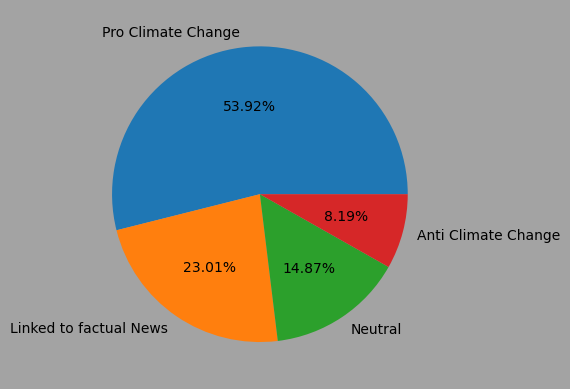

In [53]:
pie_x_new = df_new.sentiment.value_counts()
labels_new = df_new.sentiment.unique()


# Define the label mapping dictionary
label_mapping_new = {1 : 'Pro Climate Change', -1 : 'Anti Climate Change', 0 : 'Neutral', 2 : 'Linked to factual News'}

# Create a vectorized function to apply the mapping
vfunc_new = np.vectorize(lambda x: label_mapping_new[x])

# Apply the mapping to the labels
mapped_labels_new = vfunc_new(labels_new)

# Remove the white background
plt.figure().set_facecolor('#A3A3A3')
plt.pie(pie_x_new ,autopct='%0.2f%%', labels = mapped_labels_new)
plt.show()

#### the pro greatly superceeds the the anti climate tweet which signifies data inbalance

In [54]:
# let us install the imbalance learn module for handling the imbalance data
! pip install imbalanced-learn

In [55]:
#fix label imbalance using the imblearn module to carry out over sampling and under sampling and build the models to check for accuracy

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

ros = RandomOverSampler()

In [56]:
df_new.head()

,sentiment,message,tweetid,clean_tweet
0,1,"[polyscimajor, epa, chief, doesnt, think, carb...",625221,polyscimajor epa chief doesnt think carbon dio...
1,1,"[its, not, like, we, lack, evidence, of, anthr...",126103,like lack evidence anthropogenic global warming
2,2,"[researchers, say, we, have, three, years, to,...",698562,researcher say three year act climate change late
3,1,"[todayinmaker, wired, 2016, was, a, pivotal, y...",573736,todayinmaker wired 2016 wa pivotal year war cl...
4,1,"[its, 2016, and, a, racist, sexist, climate, c...",466954,2016 racist sexist climate change denying bigo...


In [57]:
# Assigning the features and the labels

X = df_new.clean_tweet
#X = X.reshape(-1, 1) # reshape X to have 2 dimensions

y = df_new.sentiment

In [58]:
X

0        polyscimajor epa chief doesnt think carbon dio...
1          like lack evidence anthropogenic global warming
2        researcher say three year act climate change late
3        todayinmaker wired 2016 wa pivotal year war cl...
4        2016 racist sexist climate change denying bigo...
                               ...                        
15814    took material global warming lgbt right health...
15815    climate change could breaking 200millionyearol...
15816    notiven nytimesworld doe trump actually believ...
15817    hey liberal climate change crap hoax tie agend...
15818                climate change equation 4 screenshots
Name: clean_tweet, Length: 15819, dtype: object

In [59]:
y.isnull().sum()

0

In [ ]:
#c = Counter(y) # count the values in the labels
#c

In [ ]:
# Application of the Oversampling technique
#X_ROS, y_ROS = ros.fit_resample(X, y)
#print(Counter(y_ROS))

In [ ]:
#pie_y_ROS = y_ROS.value_counts()
#labels_new = y.unique()


# Define the label mapping dictionary
#label_mapping_ROS = {1 : 'Pro Climate Change', -1 : 'Anti Climate Change', 0 : 'Neutral', 2 : 'Linked to factual News'}

# Create a vectorized function to apply the mapping
#vfunc_ROS = np.vectorize(lambda x: label_mapping_ROS[x])

# Apply the mapping to the labels
#mapped_labels_ROS = vfunc_ROS(labels_new)

# Remove the white background
#plt.figure().set_facecolor('#A3A3A3')
#plt.pie(pie_y_ROS ,autopct='%0.2f%%', labels = mapped_labels_ROS)
#plt.show()

In [ ]:
# # Define the pipeline
# from sklearn.pipeline import Pipeline, FeatureUnion
# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# # Define the vectorizers
# tfidf_vectorizer = TfidfVectorizer(max_features=4000)
# count_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=4000, stop_words='english')

# # Define the pipeline
# pipeline = Pipeline([
#     ('vectorizer', FeatureUnion([
#         ('tfidf', tfidf_vectorizer),
#         ('count', count_vectorizer)
#     ]))])

# # Fit and transform the data using the pipeline
# X_vectorized = pipeline.fit_transform(X_list)

In [ ]:
# Convert the input data to a list of strings

#X_ROS_list = [str(x) for x in X_ROS]

In [ ]:
!pip install lightgbm

In [60]:
# Lets split the data using the sklearn train test_test_split module

from sklearn.model_selection import train_test_split

# Split the data set to training and validation data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building

**we'll make use of the countvectorizer and TfidfTransformer for feature transformation on our tweets and converting it to binary array for our classifier**

In [61]:
# we'll use the pipeline module to combine both transformation and classifiers at a go?

from sklearn.pipeline import Pipeline, FeatureUnion # pipeline and FeatureUnion for concatenating both type of transformers features to read information captured by both transformers
from sklearn.feature_extraction.text import TfidfVectorizer # Tfidf vectorizer
from sklearn.feature_extraction.text import CountVectorizer # countvectorizer
from sklearn.svm import SVC  # SVM classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
from sklearn.neighbors import KNeighborsClassifier  # KNN classifier
from sklearn.naive_bayes import GaussianNB  # Naive Bayes classifier
from lightgbm import LGBMClassifier  # LightGBM classifier

from sklearn.metrics import accuracy_score, f1_score, classification_report # evaluation metric

### First Model - SVC

**Use the sklearn pipeline module to link the transformation and feature extraction together**

In [63]:
# Define the pipeline steps

count_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=4000, stop_words='english')
tfidf_vectorizer = TfidfVectorizer(max_features=4000)
svm_classifier = SVC(kernel='rbf')

svc_steps = [
    ('feature_union', FeatureUnion([
        ('count_vectorizer', count_vectorizer),
        ('tfidf_vectorizer', tfidf_vectorizer)
    ])),
    ('classifier', svm_classifier)
]

# Create the pipeline
svc_pipe = Pipeline(svc_steps)

# Fit the pipeline to the training data
svc_pipe.fit(X_train, y_train)

# Evaluate on the test data
accuracy = svc_pipe.score(X_test, y_test)

# Make predictions on the testing data
y_pred_svc = svc_pipe.predict(X_test)


# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred_svc)
print(accuracy)

0.7319848293299621


In [ ]:
svc_pipe_report = classification_report(y_test, y_pred_svc)
print("\n\nClassification Report:\n\n", svc_pipe_report)



Classification Report:

               precision    recall  f1-score   support

          -1       0.82      0.26      0.40       278
           0       0.64      0.36      0.46       425
           1       0.73      0.91      0.81      1755
           2       0.77      0.70      0.74       706

    accuracy                           0.73      3164
   macro avg       0.74      0.56      0.60      3164
weighted avg       0.73      0.73      0.71      3164



**Built another model using the tfidfvectorizer()**

In [ ]:
svc_steps_tfidf = [
    ('tfidf_vectorizer', tfidf_vectorizer),
    ('classifier', svm_classifier)
]

# Create the pipeline
svc_pipe_tfidf = Pipeline(svc_steps_tfidf)

In [ ]:
svc_pipe_tfidf.fit(X_train, y_train)

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer(max_features=4000)),
                ('classifier', SVC())])

In [ ]:
svc_pipe_tfidf_pred = svc_pipe_tfidf.predict(X_test)

In [ ]:
svc_pipe_tfidf_pred

array([1, 2, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
# created a function to calculate the accuracy score

def calculate_accuracy(clf, X_test, y_test):
    #your code here
    
    # use the trained model to carry out prediction
    y_pred = clf.predict(X_test)
    
    # check for accuracy
    acc = accuracy_score(y_test, y_pred)
    print(acc)

In [ ]:
accuracy = calculate_accuracy(svc_pipe_tfidf, X_test, y_test)
accuracy

0.7316687737041719


In [ ]:
rep = classification_report(y_test, svc_pipe_tfidf_pred)
rep

'              precision    recall  f1-score   support\n\n          -1       0.87      0.29      0.43       278\n           0       0.70      0.33      0.45       425\n           1       0.72      0.92      0.81      1755\n           2       0.77      0.68      0.72       706\n\n    accuracy                           0.73      3164\n   macro avg       0.77      0.55      0.60      3164\nweighted avg       0.74      0.73      0.71      3164\n'

In [ ]:
# created a function to get the class report for each model created

def get_class_report(clf, X_test, y_test):
    #your code here
    
    # create the predictions
    y_pred = clf.predict(X_test)
    
    # create the report
    report = classification_report(y_test, y_pred)
    
    return report
    


In [ ]:
print("\n\nClassification Report:\n\n", get_class_report(svc_pipe_tfidf, X_test, y_test))



Classification Report:

               precision    recall  f1-score   support

          -1       0.87      0.29      0.43       278
           0       0.70      0.33      0.45       425
           1       0.72      0.92      0.81      1755
           2       0.77      0.68      0.72       706

    accuracy                           0.73      3164
   macro avg       0.77      0.55      0.60      3164
weighted avg       0.74      0.73      0.71      3164



**Since tfidfVectorizer prove to be more effective than the count vectorizer from our built models and evaluation, we will focus on the use of tfidfvectorizer**

In [ ]:
daf = pd.DataFrame(svc_pipe_tfidf_pred, columns=['sentiment'])
daf.head()

,sentiment
0,1
1,2
2,1
3,1
4,1


In [ ]:
daf.shape

(3164, 1)

In [ ]:
df_test.shape

(10546, 2)

9059     texas experiencing third 500year flood 3 year ...
169      conservative columnist siege ny time debut cli...
5331     muslim clerk gave u lecture todayampsaid thatb...
6333     doomsday forecaster changed narrative coming i...
10383    man got global warming freezer fucked food cba...
                               ...                        
14706          normal march snowstorm blame climate change
7387     like lying global warming becoming multi milli...
3559     svalbard global seed vault get 44m upgrade res...
7401     let assume climate change isnt happening clean...
3780     ocean rising climate change panicer ha waterfr...
Name: clean_tweet, Length: 3164, dtype: object

In [ ]:
output = pd.DataFrame({"tweetid" : X_test['tweetid']})
submission = output.join(daf)
submission.to_csv("submission.csv", index=False)

KeyError: 'tweetid'

### RandomforestClassifier

In [ ]:
# Building the random forest classifier

forest = RandomForestClassifier()   # initialiize the forest classifier


forest_steps = [
    ('tfidf_vectorizer', tfidf_vectorizer),
    ('classifier', forest)
]

# Create the pipeline
forest_pipe = Pipeline(forest_steps)

In [ ]:
# train the model
forest_pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer(max_features=4000)),
                ('classifier', RandomForestClassifier())])

In [ ]:
pred_forest = forest_pipe.predict(X_test) # make prediction on the test data for validation

In [ ]:
pred_forest

array([1, 2, 1, ..., 1, 1, 0], dtype=int64)

In [ ]:
print("\n\nClassification Report:\n\n", get_class_report(forest_pipe, X_test, y_test))



Classification Report:

               precision    recall  f1-score   support

          -1       0.88      0.24      0.38       278
           0       0.55      0.34      0.42       425
           1       0.70      0.87      0.78      1755
           2       0.71      0.64      0.67       706

    accuracy                           0.69      3164
   macro avg       0.71      0.52      0.56      3164
weighted avg       0.70      0.69      0.67      3164



**Parameter Grid Search for RandomForestClassifier()**

In [ ]:
# import the model selection gridsearchcv modeule from the sklearn package
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the parameter grid for grid search
param_grid = {
    'vectorizer__max_features': [2000, 4000, 6000],  # Vary the max_features parameter of TfidfVectorizer
    'classifier__n_estimators': [100, 200, 300],  # Vary the number of estimators in RandomForestClassifier
    'classifier__max_depth': [None, 5, 10]  # Vary the maximum depth of the trees in RandomForestClassifier
}

# create the pipe
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', RandomForestClassifier())
])

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the testing data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
acc_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("\n\nClassification Report:\n\n", acc_report)

Best Parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 200, 'vectorizer__max_features': 6000}
Best Score: 0.6898459107072302
Accuracy: 0.6997471554993678


Classification Report:

               precision    recall  f1-score   support

          -1       0.87      0.24      0.38       278
           0       0.56      0.32      0.40       425
           1       0.70      0.89      0.78      1755
           2       0.73      0.65      0.69       706

    accuracy                           0.70      3164
   macro avg       0.71      0.52      0.56      3164
weighted avg       0.70      0.70      0.67      3164



### KNN classifier

In [ ]:
# Building the random knn classifier

kclf = KNeighborsClassifier()   # initialiize the forest classifier


kclf_steps = [
    ('tfidf_vectorizer', tfidf_vectorizer),
    ('classifier', kclf)
]

# Create the pipeline
knn_pipe = Pipeline(kclf_steps)

In [ ]:
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer(max_features=4000)),
                ('classifier', KNeighborsClassifier())])

In [ ]:
y_pred_knn = knn_pipe.predict(X_test)
print(y_pred_knn)
print("\n\nClassification Report:\n\n", get_class_report(knn_pipe, X_test, y_test))

[1 1 1 ... 2 0 1]


Classification Report:

               precision    recall  f1-score   support

          -1       0.48      0.40      0.44       278
           0       0.35      0.47      0.40       425
           1       0.74      0.71      0.72      1755
           2       0.65      0.64      0.64       706

    accuracy                           0.63      3164
   macro avg       0.56      0.55      0.55      3164
weighted avg       0.65      0.63      0.64      3164



In [ ]:
# parameter tunning

param_grid = {
    'classifier__n_neighbors': [3, 5, 7],  # Vary the number of neighbors
    'classifier__weights': ['uniform', 'distance'],  # Vary the weight function
    'classifier__p': [1, 2]  # Vary the distance metric
}

pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', KNeighborsClassifier())
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
acc_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("\n\nClassification Report:\n\n", acc_report)

C:\Users\rave_consolidate\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\rave_consolidate\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

C:\Users\rave_consolidate\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\rave_consolidate\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

Best Parameters: {'classifier__n_neighbors': 3, 'classifier__p': 2, 'classifier__weights': 'distance'}
Best Score: 0.8480381324614479
Accuracy: 0.8539441248972884


Classification Report:

               precision    recall  f1-score   support

           0       0.78      0.97      0.87      2378
           1       0.97      0.74      0.84      2490

    accuracy                           0.85      4868
   macro avg       0.87      0.86      0.85      4868
weighted avg       0.88      0.85      0.85      4868



### LightGBM classifier model

In [ ]:
# initialize the model object?

lgb = LGBMClassifier()

lgb_steps = [
    ('tfidf_vectorizer', tfidf_vectorizer),
    ('classifier', lgb)
]

# Create the pipeline
lgbclf_pipe = Pipeline(lgb_steps)

In [ ]:
# train the model by fitting the training data to the classifier

lgbclf_pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer(max_features=4000)),
                ('classifier', LGBMClassifier())])

In [ ]:
y_lgb_predict = lgbclf_pipe.predict(X_test)
print(y_lgb_predict)
print("\n\nClassification Report:\n\n", get_class_report(lgbclf_pipe, X_test, y_test))

[1 2 1 ... 1 1 1]


Classification Report:

               precision    recall  f1-score   support

          -1       0.70      0.35      0.47       278
           0       0.53      0.39      0.45       425
           1       0.73      0.85      0.79      1755
           2       0.70      0.66      0.68       706

    accuracy                           0.70      3164
   macro avg       0.66      0.56      0.59      3164
weighted avg       0.69      0.70      0.69      3164



**Lets perform a grid search to find the best parameters**

In [ ]:
# Define the parameter grid
param_grid = {
    'tfidf_vectorizer__max_features': [2000, 4000, 6000],  # Vary the max_features parameter of TfidfVectorizer
    'classifier__n_estimators': [100, 200, 300],  # Vary the number of estimators in LGBMClassifier
    'classifier__max_depth': [None, 5, 10]  # Vary the maximum depth of the trees in LGBMClassifier
}

# Create the pipeline
lgb_steps = [
    ('tfidf_vectorizer', tfidf_vectorizer),
    ('classifier', LGBMClassifier())
]
lgbclf_pipe = Pipeline(lgb_steps)

# Perform grid search
grid_search = GridSearchCV(lgbclf_pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the testing data
y_pred = best_model.predict(X_test)
print("\n\nClassification Report:\n\n", classification_report(y_test, y_pred))

Best Parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 300, 'tfidf_vectorizer__max_features': 6000}
Best Score: 0.8594389182396405


Classification Report:

               precision    recall  f1-score   support

           0       0.84      0.92      0.88      2378
           1       0.91      0.83      0.87      2490

    accuracy                           0.87      4868
   macro avg       0.88      0.88      0.87      4868
weighted avg       0.88      0.87      0.87      4868

